<a href="https://colab.research.google.com/github/pcjones08/Math254/blob/main/Logistic_Regression_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
mydata <- read.csv('https://raw.githubusercontent.com/gitcnk/Data/master/MedSchoolApplicants.csv',
                    stringsAsFactors = TRUE)


In [5]:
names(mydata)
head(mydata)

[1] "Accept"      "Accept_code" "Sex"         "BCPM"        "GPA"        
 [6] "VR"          "PS"          "WS"          "BS"          "MCAT"       
[11] "Apps"

,Accept,Accept_code,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,D,0,F,3.59,3.62,11,9,9,9,38,5
2,A,1,M,3.75,3.84,12,13,8,12,45,3
3,A,1,F,3.24,3.23,9,10,5,9,33,19
4,A,1,F,3.74,3.69,12,11,7,10,40,5
5,A,1,F,3.53,3.38,9,11,4,11,35,11
6,A,1,M,3.59,3.72,10,9,7,10,36,5


## This is the HW for Thursday!  

The goal is to build a model to predict the acceptance to medical school based pn servaral predictors.

The Medical College Admissions Test (MCAT) has four sections:
- Verbal Reasoning (VR)
- Physical Sciences (PS)
- Biological Sciences (BS)
- Writing Sample (WS)

Q1: Explore the distribution of GPA values for Accepted and Denied candidates


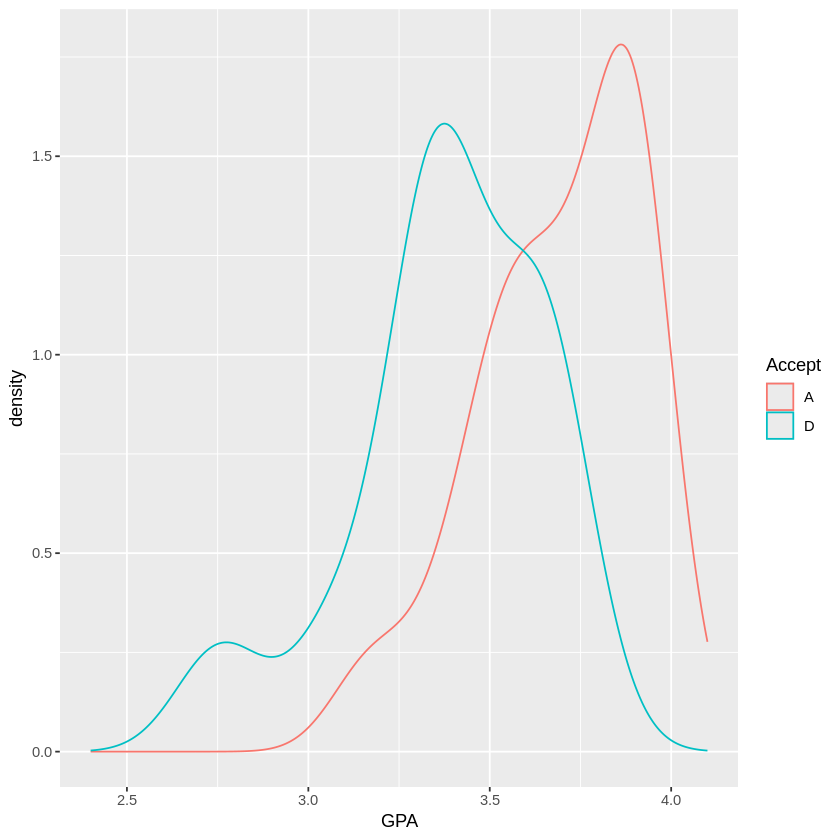

In [6]:
mydata %>%
  ggplot() +
  aes( x = GPA, col = Accept) +
  geom_density() +
  xlim(c(2.4,4.1))

Q2: Explore the distribution of MCAT values for cccepted and denied candidates.





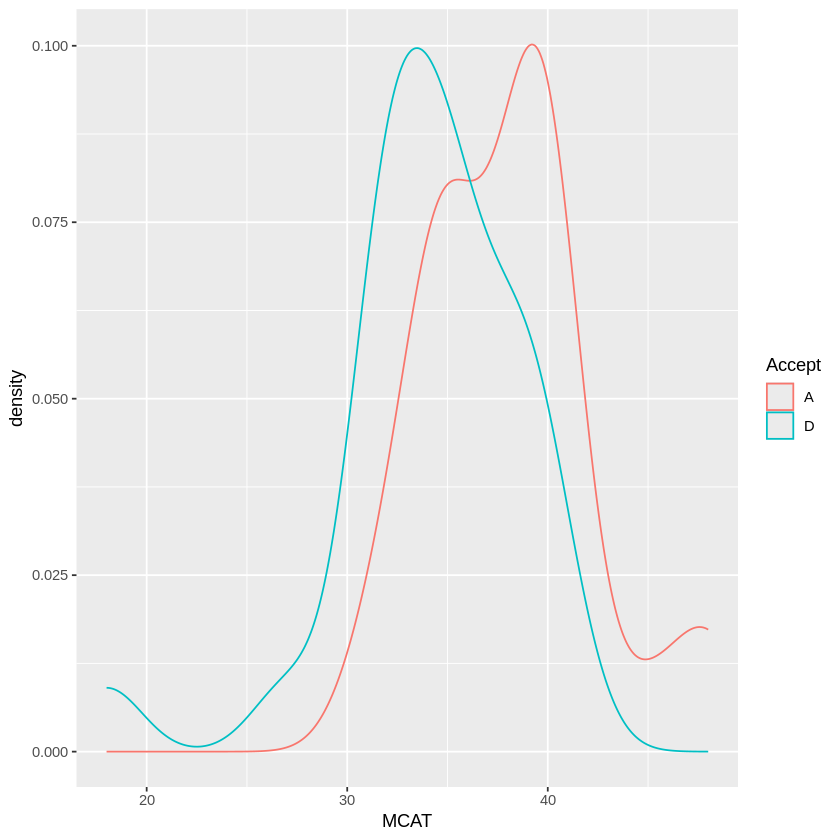

In [9]:
mydata %>%
  ggplot() +
  aes(x = MCAT, col = Accept) +
  geom_density()

Q3: Explore the distribution of number of applications submitted for Accepted and Denied candidates



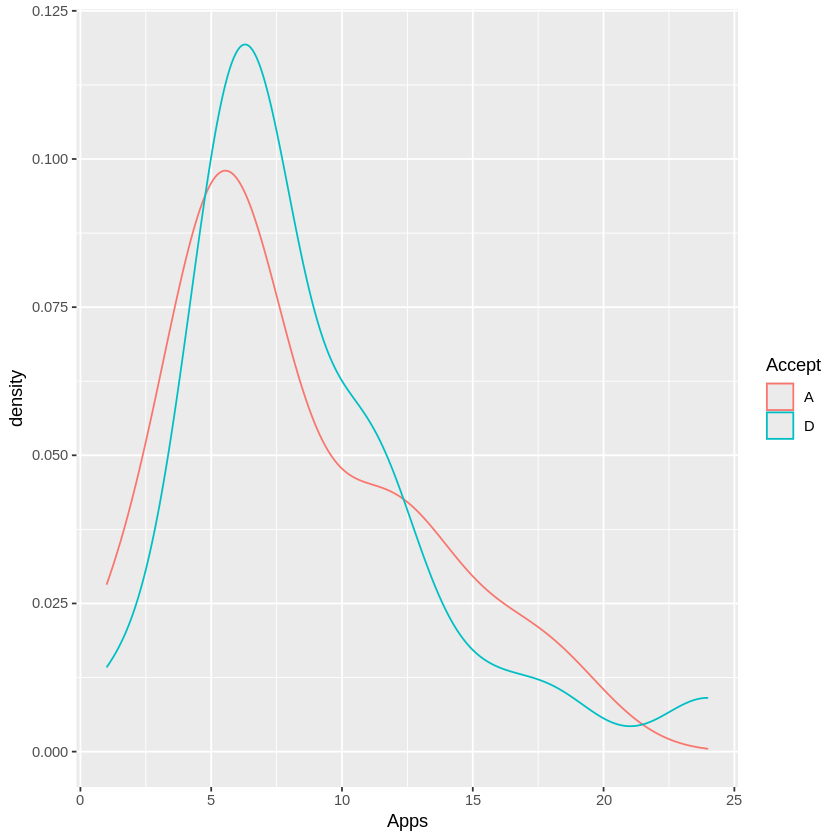

In [10]:
mydata %>%
  ggplot() +
  aes(x = Apps, col = Accept) +
  geom_density()

Q4: Is there a correlation beteween GPA values and MCAT values for Accepted and Denied candidates?  
**Hint:** Use a scatterplot.

Q5: Is this relationship similar(or different) for males and females.  
**Hint:** Use facets.


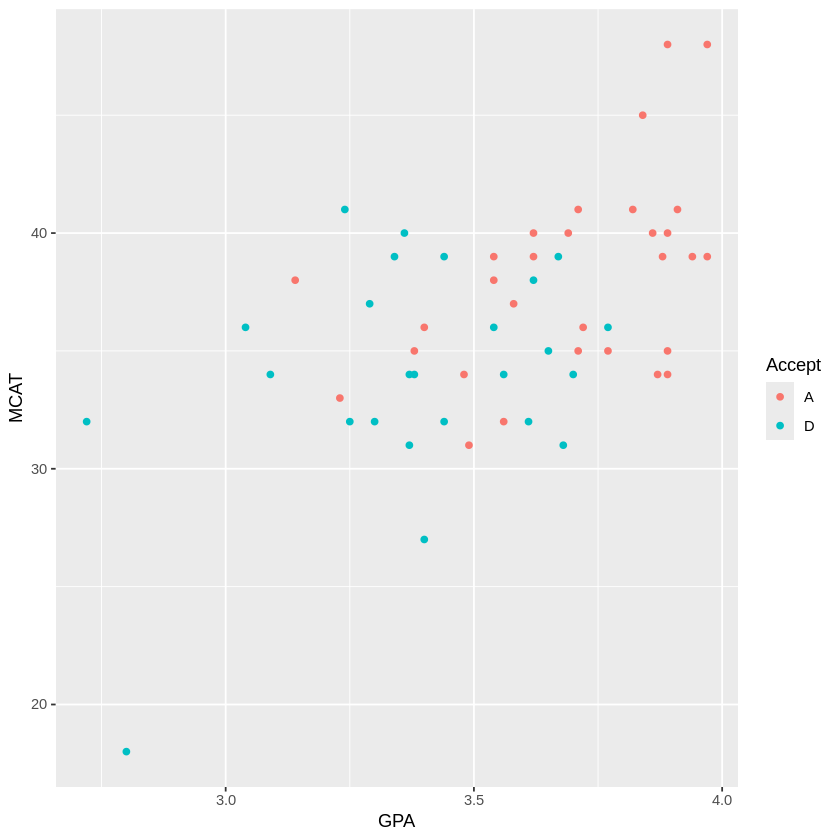

In [11]:
mydata %>%
  ggplot() +
  aes(x = GPA, y = MCAT, col = Accept) +
  geom_point()

I see a strong relationship for accepted students between MCAT and GPA, in general, as GPA is higher, MCAT is also generally higher. There doesn't seem to be as much of a correlation for MCAT and GPA for denied. There is some relationship but not as strong.

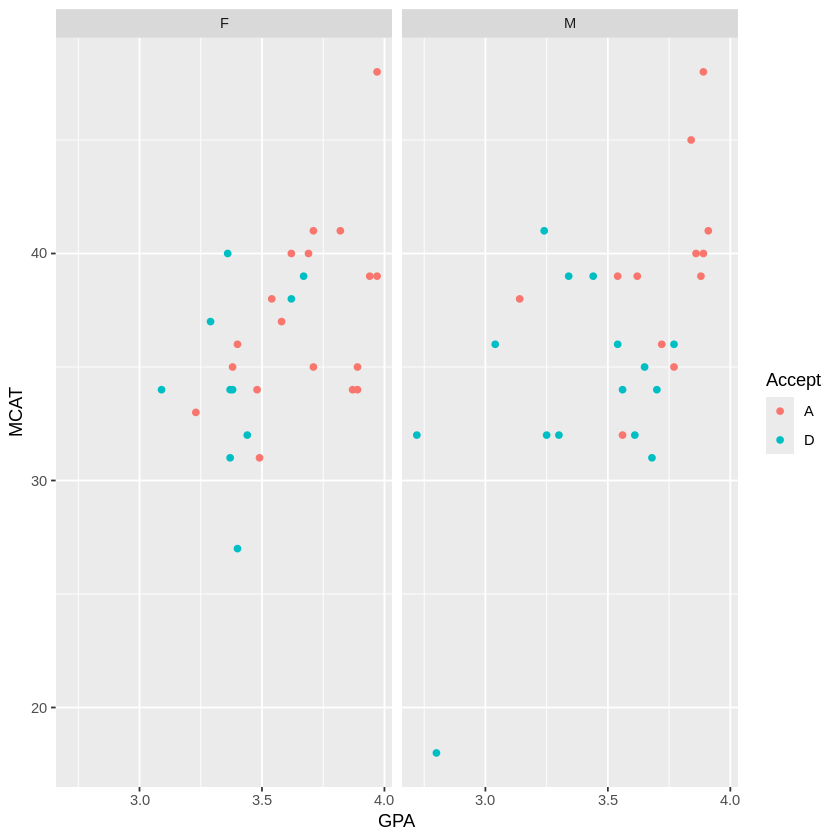

In [12]:
mydata %>%
  ggplot() +
  aes(x = GPA, y = MCAT, col = Accept) +
  geom_point() +
    facet_wrap(~Sex)



Females seems to be relatively correlated. We see an upward trend. For males this breaks down a bit. There is some positive trend but it is not as clear visually as with the females. This might be being drawn down by our outlier on the males though, which we can check below.

In [14]:
mydata %>%
  filter(MCAT > 20) %>%
    group_by(Sex) %>%
    summarize(cor(GPA,MCAT))

Sex,"cor(GPA, MCAT)"
<fct>,<dbl>
F,0.5097200
M,0.4008728


Q6: Draw a plot to explore the relationship between GPA and acceptance.  Add the logistic regression curve into the plot.

`geom_smooth()` using formula = 'y ~ x'


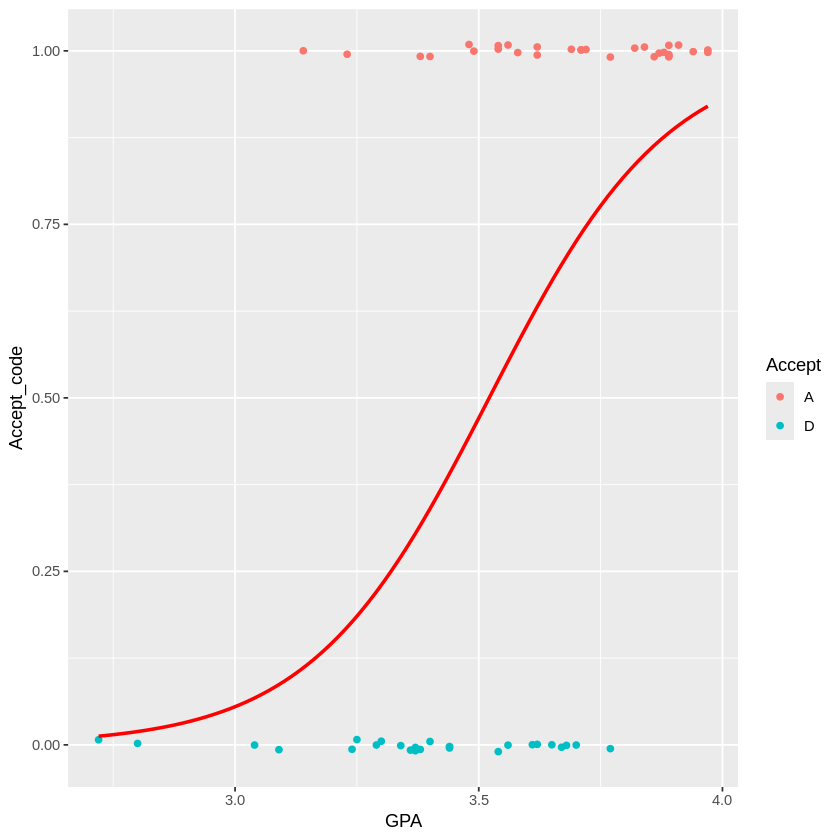

In [ ]:
mydata %>%
ggplot() +
  aes(x = GPA, y = Accept_code, col = Accept) +
  geom_jitter(height = 0.01, width = 0) +
  geom_smooth(method = 'glm',
              method.args = list(family = 'binomial'),
              se = FALSE ,
              col = 'red' ,
              fullrange = TRUE)


Q7: Is the probability of acceptance based on GPA is similar(or different) for males and females?

Q8: Use the `glm()` command to fit a logistic model to predict the acceptance probability usinig `GPA` and `Sex` as predictors

In [ ]:
model2 <- glm(Accept_code ~ GPA + Sex + GPA*Sex)

Q9: Write down equations of the two fitted logistic curves.

Q10: What is the $R^2$ of your model?  Do you see one in your model output?